In [8]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit


from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from scipy.stats import norm

from os import listdir
from os.path import isfile, join

In [9]:
ini_fileName =   '/Users/saravannah/Axion-MCMC/axion_MCMC/Nov-5-runs/Nov-5-combined.txt' 
log10_axion_ac, log10_fraction_axion_ac, omega_cdm, H0, Djs = np.loadtxt(ini_fileName, unpack = True)

In [10]:
params = [10**log10_fraction_axion_ac,log10_axion_ac, H0, omega_cdm ]
par_names = ['fEDE(a_c)', 'log_10(a_c)', 'H0', 'omega_CDM']

In [11]:
mus = np.zeros(len(params))
sigmas = np.zeros(len(params))
for _ in range(len(params)):
    mus[_], sigmas[_] = norm.fit(params[_])

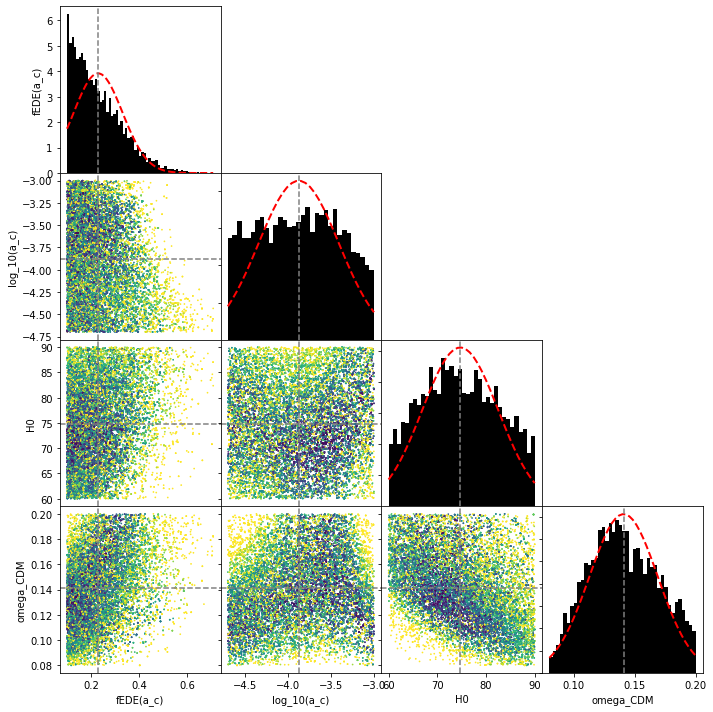

In [12]:
fig, axs = plt.subplots(4,4, figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


cmap = plt.get_cmap('PiYG')
norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for rows in range(len(params)):
    for cols in range(len(params)):
        if rows == cols:
            #axs[rows,cols].scatter(params[rows], Djs)
            n, bins, patches = axs[rows,cols].hist(params[rows], bins='auto', density=1, color='black')
            y = sp.stats.norm.pdf(bins, mus[rows], sigmas[rows])
            l = axs[rows,cols].plot(bins, y, 'r--', linewidth=2)
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            
        if cols < rows:
            #infuriatingly, the (x,y) for subplots is backwards - it's (rows, cols) or (y,x)
            axs[rows,cols].scatter(params[cols], params[rows], s=0.5, c=Djs, norm=matplotlib.colors.LogNorm(vmin=min(Djs), vmax=min(Djs)*2))
            
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            axs[rows,cols].axhline(y=mus[rows], linestyle='dashed', color='gray')
            
        if cols > rows:
            axs[rows][cols].axis('off')

for rows in range(len(params)):
    for cols in range(len(params)):
        if cols == 0:
            axs[rows,cols].set_ylabel(par_names[rows])
        if rows == 3:
            axs[rows,cols].set_xlabel(par_names[cols])
        if cols > 0:
            axs[rows,cols].set_yticklabels([])
        if rows < 3: 
            axs[rows,cols].set_xticklabels([])
            
#fig.colorbar(im, ax=axs[2][3])           
plt.tight_layout()

#plt.savefig('n=3_triangle_v1.png')

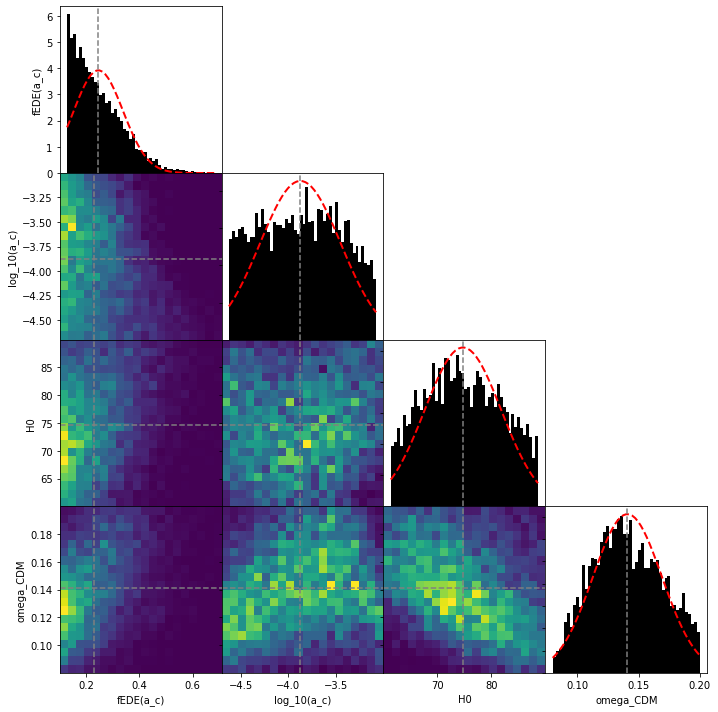

In [13]:
fig, axs = plt.subplots(4,4, figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


cmap = plt.get_cmap('PiYG')
norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for rows in range(len(params)):
    for cols in range(len(params)):
        if rows == cols:
            #axs[rows,cols].scatter(params[rows], Djs)
            n, bins, patches = axs[rows,cols].hist(params[rows], bins=50, density=1, color='black')
            y = sp.stats.norm.pdf(bins, mus[rows], sigmas[rows])
            l = axs[rows,cols].plot(bins, y, 'r--', linewidth=2)
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            
        if cols < rows:
            #infuriatingly, the (x,y) for subplots is backwards - it's (rows, cols) or (y,x)
            axs[rows,cols].hist2d(params[cols], params[rows], bins=(20,20))
            
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            axs[rows,cols].axhline(y=mus[rows], linestyle='dashed', color='gray')
            
        if cols > rows:
            axs[rows][cols].axis('off')

for rows in range(len(params)):
    for cols in range(len(params)):
        if cols == 0:
            axs[rows,cols].set_ylabel(par_names[rows])
        if rows == 3:
            axs[rows,cols].set_xlabel(par_names[cols])
        if cols > 0:
            axs[rows,cols].set_yticklabels([])
        if rows < 3: 
            axs[rows,cols].set_xticklabels([])
            
#fig.colorbar(im, ax=axs[2][3])           
plt.tight_layout()

In [14]:
#find the files in directory
#from https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
path = '/Users/saravannah/Axion-MCMC/axion_MCMC/Nov-5-runs/chains/'
name = 'Nov-5'
files = [f for f in listdir(path) if isfile(join(path, f)) and name in f]
print(files)

['Nov-5#1.txt', 'Nov-5#0.txt', 'Nov-5#2.txt', 'Nov-5#3.txt', 'Nov-5#7.txt', 'Nov-5#6.txt', 'Nov-5#4.txt', 'Nov-5#5.txt', 'Nov-5#8.txt', 'Nov-5#9.txt']


In [27]:
num_chains = len(files)
num_params = 4+1 #number of parameters you're varying plus Djs
len_chains = int(len(log10_axion_ac)/num_chains)
burn_in_steps = 0

print(len_chains, num_chains, num_params)

chain_arr = np.zeros((num_chains, num_params, len_chains))

chain_number = 0
for fileName in files:
    if name in fileName:
        chain = np.zeros((num_params, len_chains))
        
        #unpacks as log10(fEDE), log10(ac), omega_CDM, H0, Djs
        chain = np.loadtxt(path+fileName, unpack=True)
        
        chain_arr[chain_number] = chain
        chain_number = chain_number + 1

2500 10 5


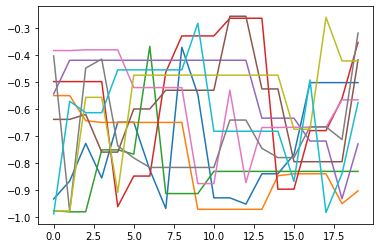

In [28]:
for i in range(num_chains):
    length = 20 #to see whole length of chains, set length = len_chains
    steps = np.arange(0, length)
    plt.plot(steps, chain_arr[i][1][0:length])

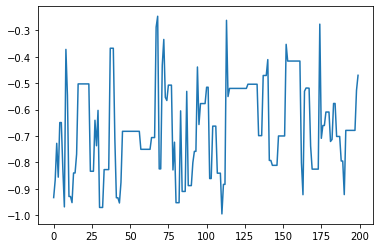

In [33]:
plt.plot(np.arange(0, 200), chain_arr[0][1][0:200])

In [18]:
#calculate Gelman-Rubin statistic to test for chain convergence
#take an array of arrays of samples for each chain
def grubin(samples, burn_in_steps, num_chains, num_steps):
    L = num_steps - burn_in_steps #np.zeros(num_chains)
    chain_mean = np.zeros(num_chains) #mean w/in chain
    

    for i in range(num_chains):
        if type(samples[i]) == np.float64:
            print('Chain number ', str(i), ' has just one sample. More steps need to be run for convergence.')
            chain_mean[i] = samples[i]
            
        elif len(samples[i]) == 0:
            print('Chain number ', str(i), ' is empty. More steps need to be run for convergence.')
            chain_mean[i] = float("NaN")
        else:
            #remove burn-in steps
            #samples[i] = samples[burn_in_steps:len(samples[i])-1] #BURN-IN STEPS ALREADY REMOVED IN MCMC
            #get mean within chain
            #chain_mean[i] = 1/L[i] * np.sum(samples[i])
            chain_mean[i] = 1/L * np.sum(samples[i])
            
            
    grand_mean = 1/num_chains * np.sum(chain_mean) #mean of means
    
    s = np.zeros(num_chains)
    for i in range(num_chains):
        s[i] = 1/(L-1) * np.sum((samples[i]-chain_mean[i])**2) #variance within chains
    B = L/(num_chains-1) * np.sum((chain_mean[i] - grand_mean)**2) #variance between chains
    W = 1/num_chains * np.sum(s)**2 #weighted variance within chains
    R = ((L-1)/L * W + 1/L * B)/W #Gelman-Rubin statistic
    #print(L, W, B, R)
    
    return R

In [19]:
print(chain_arr[:,1,:])

[[-0.93345522 -0.86697826 -0.72781002 ... -0.8601792  -0.78214206
  -0.73933593]
 [-0.55090121 -0.55090121 -0.64364766 ... -0.50359688 -0.50359688
  -0.50359688]
 [-0.97706103 -0.98101993 -0.98101993 ... -0.87195983 -0.89748043
  -0.69642055]
 ...
 [-0.40396428 -0.98097195 -0.44885157 ... -0.75235878 -0.75235878
  -0.75235878]
 [-0.97799454 -0.97799454 -0.55724891 ... -0.55315617 -0.55315617
  -0.55315617]
 [-0.98877529 -0.57167576 -0.61411589 ... -0.52049204 -0.52049204
  -0.52049204]]


In [20]:

gr_log10_axion_ax = grubin(chain_arr[:,1,:], burn_in_steps, num_chains, len_chains)
gr_log10_fraction_ac = grubin(chain_arr[:,0,:], burn_in_steps, num_chains, len_chains)
gr_omega_cdm = grubin(chain_arr[:,2,:], burn_in_steps, num_chains, len_chains)
gr_H0 = grubin(chain_arr[:,3,:], burn_in_steps, num_chains, len_chains)


In [21]:
print('Gelman-Rubin statistic for log10_axion_ac is ',gr_log10_axion_ax )
print('Gelman-Rubin statistic for log10_fraction_ac is ', gr_log10_fraction_ac)
print('Gelman-Rubin statistic for omega_cdm is ', gr_omega_cdm)
print('Gelman-Rubin statistic for H0 is ', gr_H0)

Gelman-Rubin statistic for log10_axion_ac is  1.0003832648166835
Gelman-Rubin statistic for log10_fraction_ac is  0.9996033785640417
Gelman-Rubin statistic for omega_cdm is  0.999849694545738
Gelman-Rubin statistic for H0 is  0.9996001771096792
